##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')


### Import important libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'C:\Users\hp\Desktop\Research\bank.csv')    #importing data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


***Data Reading***

In [3]:
data.isnull().sum().sum()

0

In [4]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [5]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [6]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [7]:
print("Default \n",data['default'].unique())
print("Loan \n",data['loan'].unique())
print("Housing \n",data['housing'].unique())
print("contact \n",data['contact'].unique())
print("poutcome \n",data['poutcome'].unique())
print("day_of_week \n",data['day_of_week'].unique())
print("month \n",data['month'].unique())

Default 
 ['no' 'unknown' 'yes']
Loan 
 ['no' 'yes' 'unknown']
Housing 
 ['no' 'yes' 'unknown']
contact 
 ['telephone' 'cellular']
poutcome 
 ['nonexistent' 'failure' 'success']
day_of_week 
 ['mon' 'tue' 'wed' 'thu' 'fri']
month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


### Data Visualization

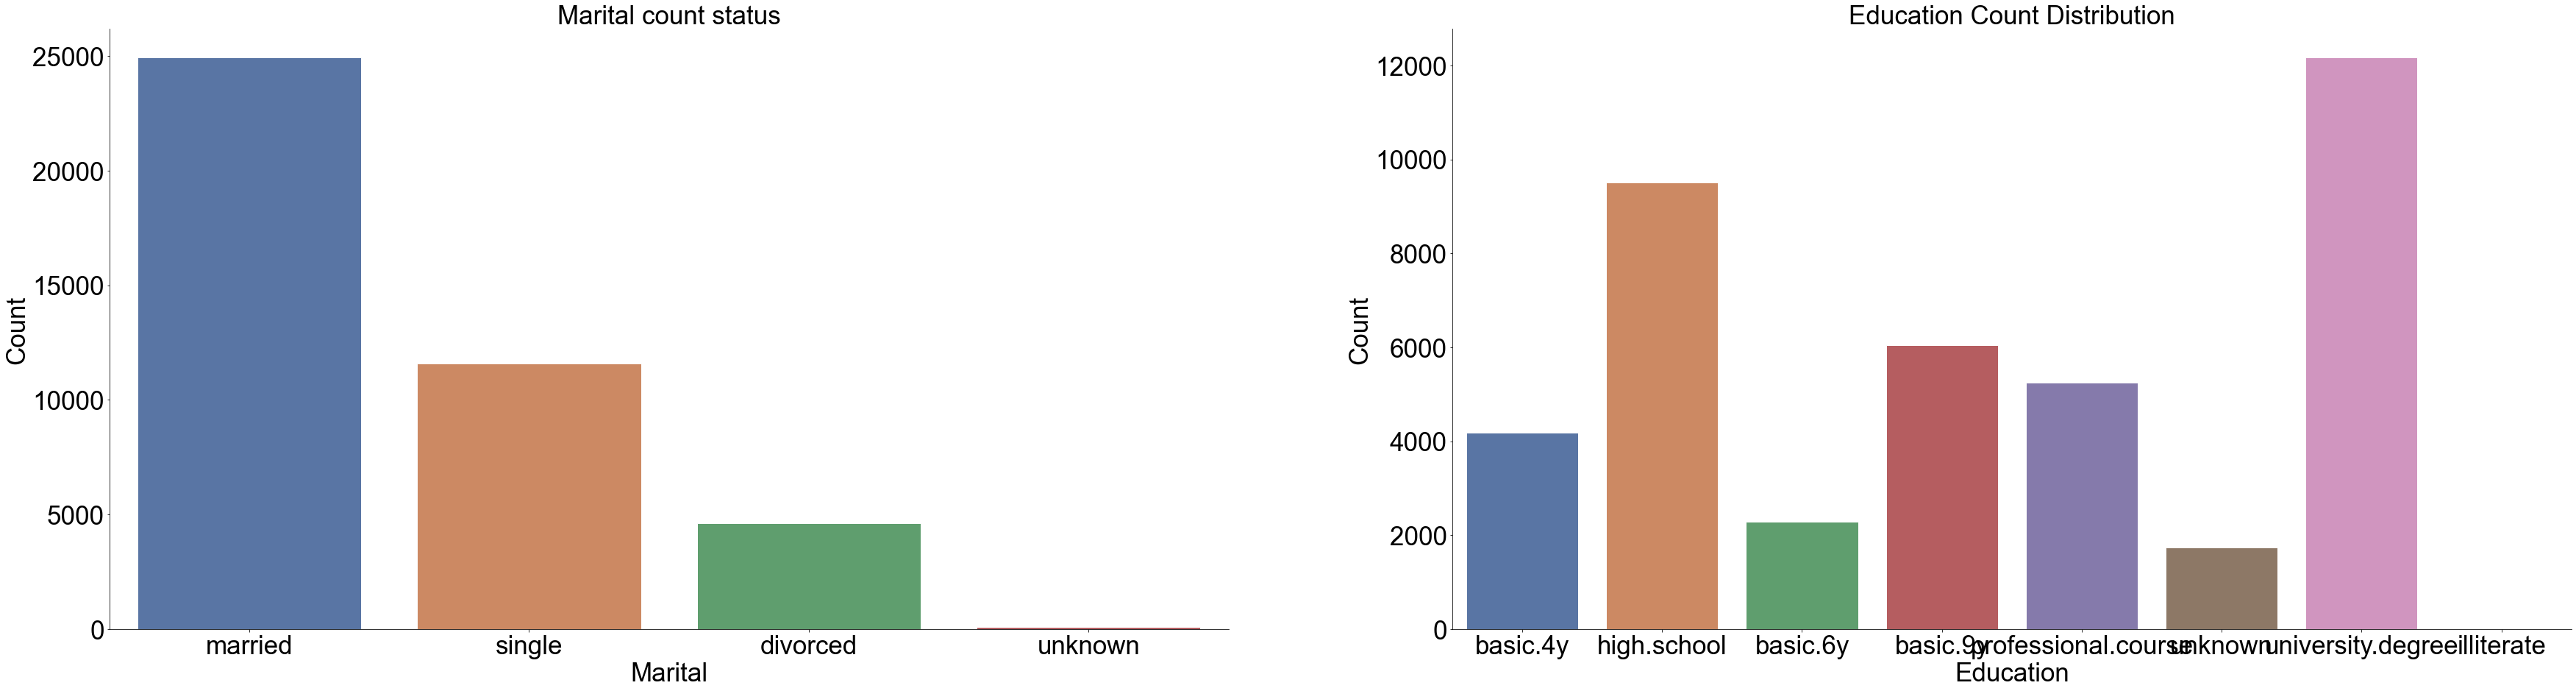

In [8]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(60,15))

##Marital Count Status
sns.set(font_scale=5)
sns.countplot(x = 'marital', data=data,ax=ax1, order=['married', 'single', 'divorced', 'unknown'])
ax1.set_title('Marital count status', fontsize=35)
ax1.set_xlabel('Marital', fontsize=35)
ax1.set_ylabel('Count', fontsize=35)
ax1.tick_params(labelsize=35)

###Education Count Distribution
sns.set(font_scale=5)
sns.countplot(x = 'education', data = data, ax=ax2,order=['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'])
ax2.set_title('Education Count Distribution', fontsize=35)
ax2.set_xlabel('Education', fontsize=35)
ax2.set_ylabel('Count', fontsize=35)

ax2.tick_params(labelsize=35)
sns.despine()

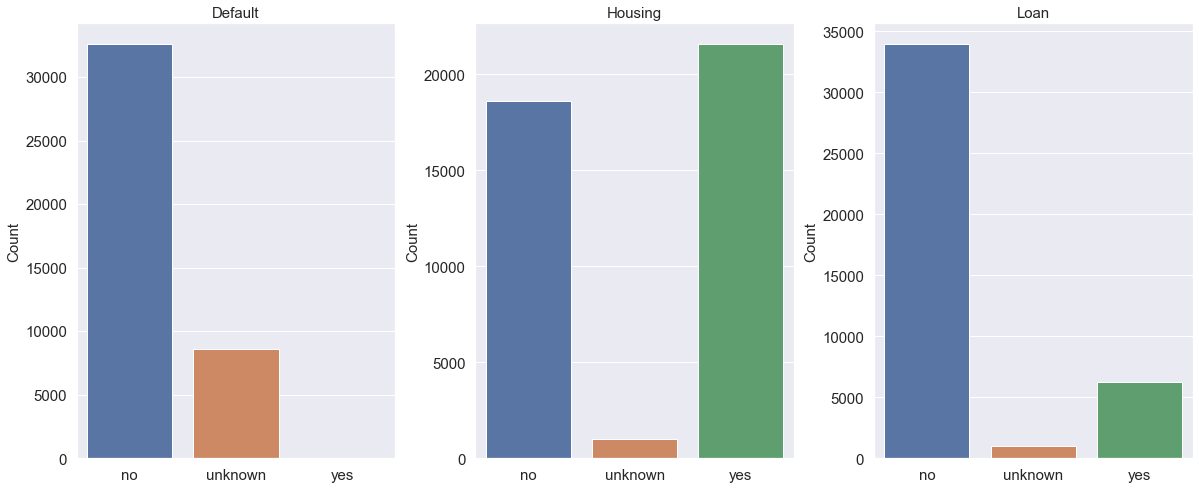

In [9]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = data, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = data, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?           
sns.countplot(x = 'loan', data = data, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.25)

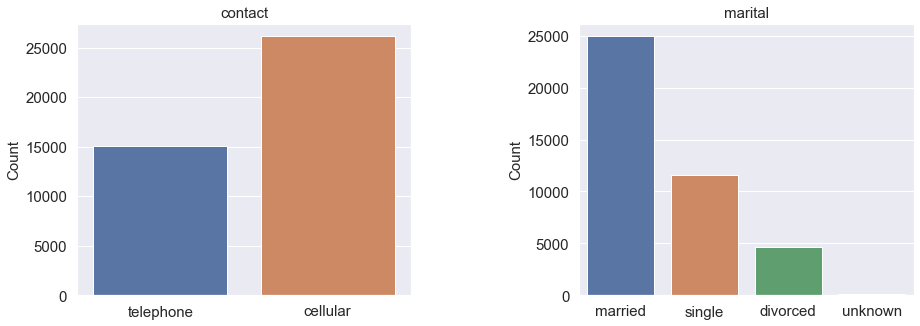

In [10]:

##
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
##Count plot for contact variable
sns.countplot(x = 'contact', data = data, ax = ax1, order = ['telephone','cellular'])
ax1.set_title('contact', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

##Count plot for Marital variable
sns.countplot(x = 'marital', data = data, ax = ax2, order = ['married', 'single', 'divorced', 'unknown'])
ax2.set_title('marital', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)

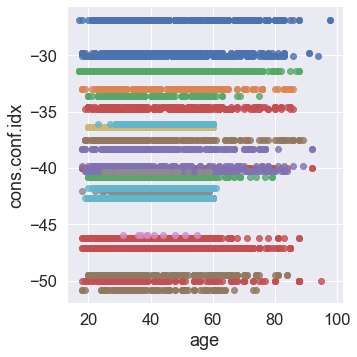

In [11]:
sns.set(font_scale=1.5)
sns.lmplot( x="age", y="cons.conf.idx", data=data, fit_reg=False, hue='emp.var.rate', legend=False)

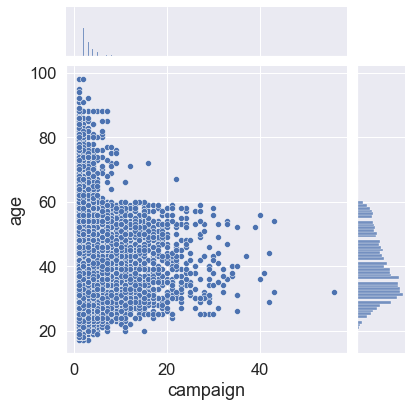

In [12]:
sns.set(font_scale=1.5)
sns.jointplot(x='campaign',y='age',data=data)

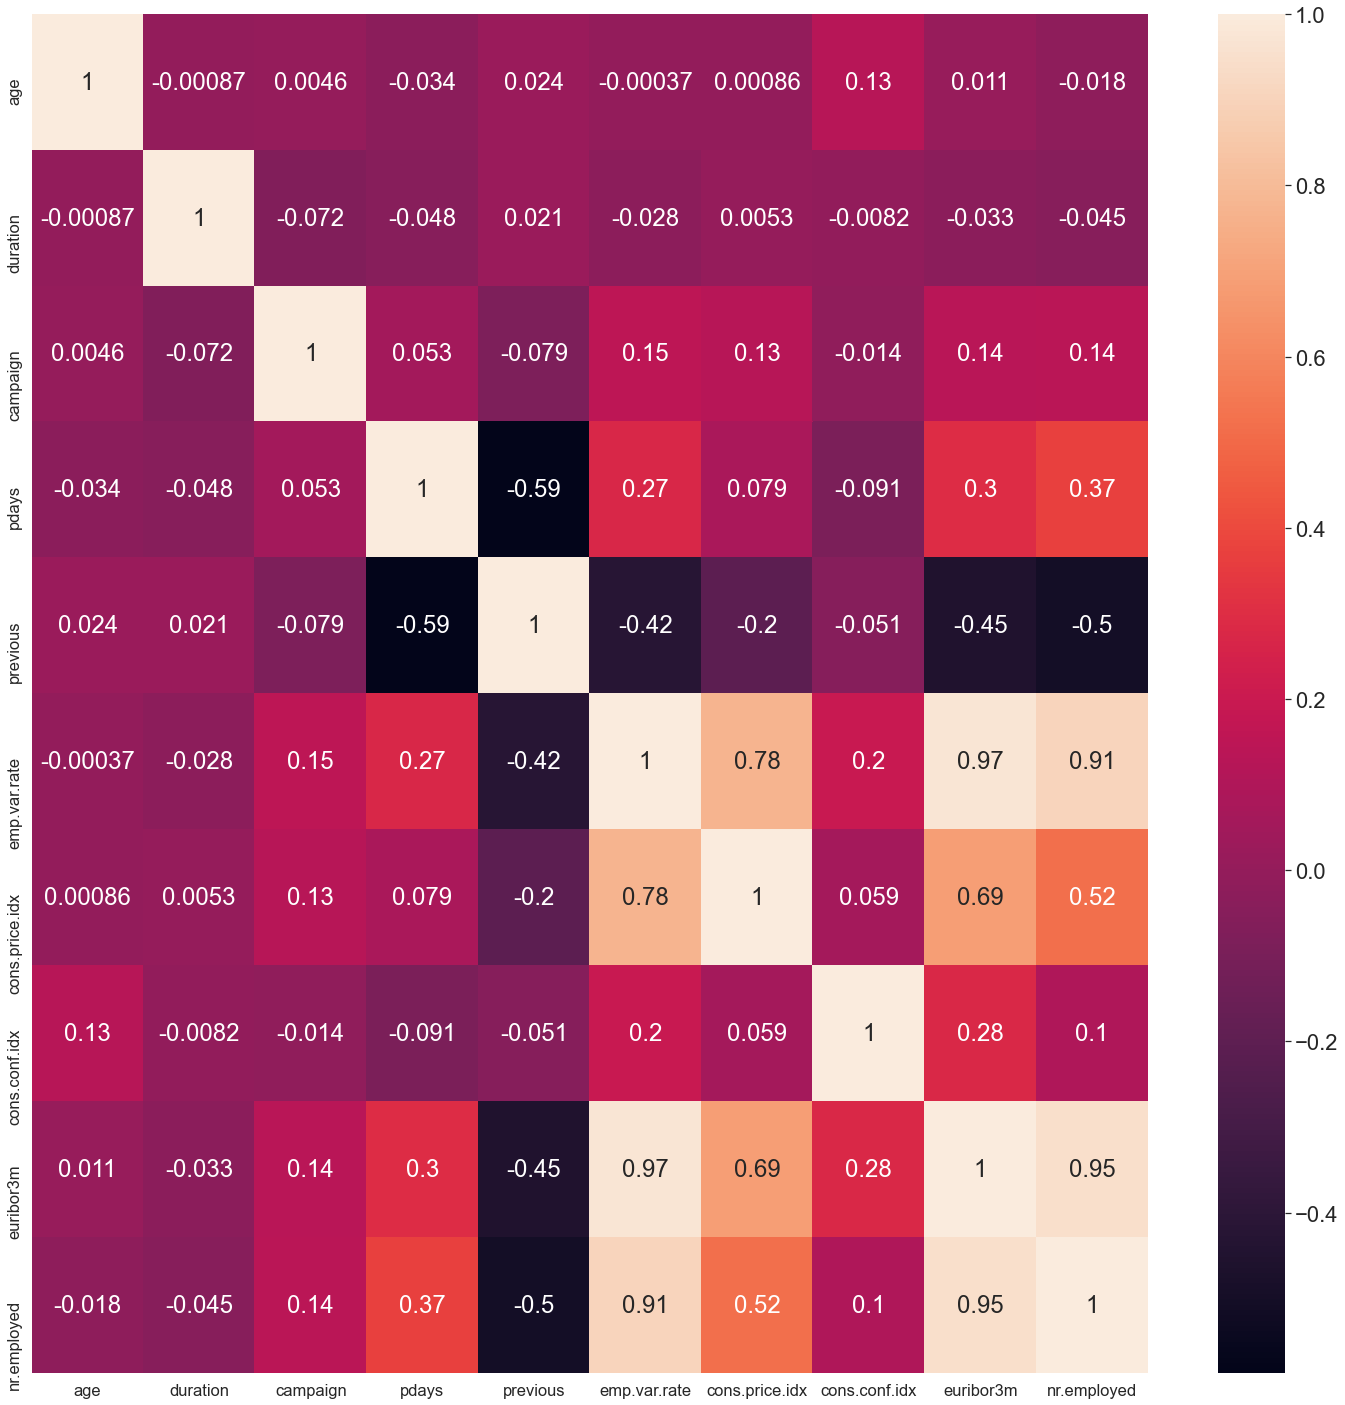

In [13]:
##Correlation plot
plt.subplots(figsize=(25,25))
sns.set(font_scale=2)
sns.heatmap(data.corr(), annot=True)
plt.show()

### Data preprocessing

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
##Converting categorical data into numerical data by using Label Encoder.
stringcols = ('job','marital','education', 'default','housing','loan','month', 'day_of_week', 'contact','poutcome','emp.var.rate','cons.conf.idx','euribor3m','nr.employed','y')
from sklearn.preprocessing import LabelEncoder

In [16]:
for c in stringcols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

In [17]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Analysis


Here in Analysis, i have taken all independent variable for better accuracy

and my dependent value would be ***'y':{'yes':"1",'No':"0"}*** (Is client has taken term deposite or not)

In [18]:
x=data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 
        'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,data['y'] ,test_size = 0.2, random_state = 100)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

***SVM***
> making model using different kernel's in svm (SVC)

**Sigmoid SVC**

In [20]:
from sklearn.metrics import roc_curve,auc
from sklearn.svm import SVC

In [21]:
svcS= SVC(kernel = 'sigmoid')
svcS.fit(X_train, y_train)
svcSpred = svcS.predict(X_test)

In [22]:
print("Confusion Matrix using sigmoid kernel \n",confusion_matrix(y_test, svcSpred))
print("Accuracy Score using sigmoid kernel \n",round(accuracy_score(y_test, svcSpred),2)*100)

Confusion Matrix using sigmoid kernel 
 [[6852  483]
 [ 502  401]]
Accuracy Score using sigmoid kernel 
 88.0


In [23]:
svcS_fpr,svcS_tpr,threshold=roc_curve(y_test,svcSpred)

In [24]:
auc_svcS=auc(svcS_fpr,svcS_tpr)

In [25]:
SVCCV = (cross_val_score(svcS, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [26]:
print(SVCCV)

0.8756297420333841


In [27]:
from sklearn.svm import SVC
svcR= SVC(kernel = 'rbf')
svcR.fit(X_train, y_train)
svcRpred = svcR.predict(X_test)

In [28]:
print("Confusion Matrix using rbf kernel \n",confusion_matrix(y_test, svcRpred))
print("Accuracy Score using rbf kernel \n",round(accuracy_score(y_test, svcRpred),2)*100)

Confusion Matrix using rbf kernel 
 [[7211  124]
 [ 637  266]]
Accuracy Score using rbf kernel 
 91.0


In [29]:
svcR_fpr,svcR_tpr,threshold=roc_curve(y_test,svcRpred)
auc_svcR=auc(svcR_fpr,svcR_tpr)

In [30]:
SVCCV1 = (cross_val_score(svcR, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [31]:
SVCCV1

0.9047040971168437

In [32]:
from sklearn.svm import SVC
svcP= SVC(kernel = 'poly',random_state=42)
svcP.fit(X_train, y_train)
svcPpred = svcP.predict(X_test)
print("Confusion matrix using polynomial kernel \n",confusion_matrix(y_test, svcPpred))
print("Accuracy Score using polynomial kernel \n",round(accuracy_score(y_test, svcPpred),2)*100)

Confusion matrix using polynomial kernel 
 [[7186  149]
 [ 659  244]]
Accuracy Score using polynomial kernel 
 90.0


In [33]:
svcP_fpr,svcP_tpr,threshold=roc_curve(y_test,svcPpred)
auc_svcP=auc(svcP_fpr,svcP_tpr)

In [34]:
SVCCV2 = (cross_val_score(svcP, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVCCV2

0.900485584218513

***Random Forest***

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=1,random_state=42)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1, random_state=42)

In [36]:
forestpred = forest.predict(X_test)

In [37]:
print("Accuracy on the training subset:(:.3f)",format(forest.score(X_train,y_train)))
print("Accuracy on the testing subset:(:.3f)",format(forest.score(X_test,y_test)))

Accuracy on the training subset:(:.3f) 0.9572382397572079
Accuracy on the testing subset:(:.3f) 0.8897790725904345


In [38]:
forest_fpr,forest_tpr,threshold=roc_curve(y_test,forestpred)
auc_forest=auc(forest_fpr,forest_tpr)

In [39]:
forestCV = (cross_val_score(forest, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
forestCV

0.8850379362670713

***Decision Tree***

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',random_state=42) #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)

[[6852  483]
 [ 435  468]]
89.0


In [41]:
dtree_fpr,dtree_tpr,threshold=roc_curve(y_test,dtreepred)
auc_dtree=auc(dtree_fpr,dtree_tpr)

In [42]:
print("Accuracy on the training subset:(:.3f)",format(dtree.score(X_train,y_train)))
print("Accuracy on the testing subset:(:.3f)",format(dtree.score(X_test,y_test)))

Accuracy on the training subset:(:.3f) 1.0
Accuracy on the testing subset:(:.3f) 0.8885651857246905


In [43]:
dtreecv = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
dtreecv

0.8884370257966616

***XgBoost Classifier***

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=20,random_state=42)
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)

[[7080  255]
 [ 430  473]]
92.0


In [45]:
xgb_fpr,xgb_tpr,threshold=roc_curve(y_test,xgbprd)
auc_xgb=auc(xgb_fpr,xgb_tpr)

In [46]:
xgbcv = (cross_val_score(xgb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
xgbcv

0.9164188163884674

***KNN Classifier***

k=1 89.14 (+/- 0.54)
k=2 89.96 (+/- 0.50)
k=3 90.02 (+/- 0.40)
k=4 90.44 (+/- 0.50)
k=5 90.42 (+/- 0.44)
k=6 90.65 (+/- 0.39)
k=7 90.59 (+/- 0.44)
k=8 90.70 (+/- 0.37)
k=9 90.73 (+/- 0.45)
k=10 90.77 (+/- 0.43)
k=11 90.83 (+/- 0.43)
k=12 90.95 (+/- 0.36)
k=13 90.98 (+/- 0.39)
k=14 90.95 (+/- 0.35)
k=15 90.99 (+/- 0.40)
k=16 90.97 (+/- 0.34)
k=17 91.05 (+/- 0.36)
k=18 91.07 (+/- 0.34)
k=19 91.09 (+/- 0.31)
k=20 91.14 (+/- 0.34)
k=21 91.08 (+/- 0.33)
k=22 91.11 (+/- 0.32)
k=23 91.10 (+/- 0.32)
k=24 91.05 (+/- 0.30)
k=25 91.04 (+/- 0.27)
The optimal number of neighbors is 19 with 91.1%


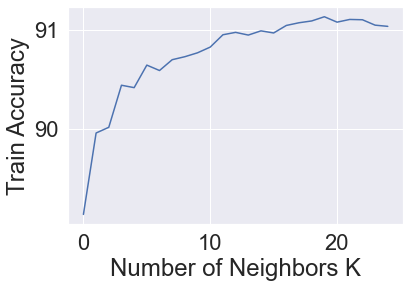

In [47]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = KFold(n_splits=10, random_state=123)
    scores =cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)


[[7118  217]
 [ 513  390]]
91.0


In [49]:
knn_fpr,knn_tpr,threshold=roc_curve(y_test,knnpred)
auc_knn=auc(knn_fpr,knn_tpr)

In [50]:
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [51]:
KNNCV

0.9105311077389985

## Evaluation

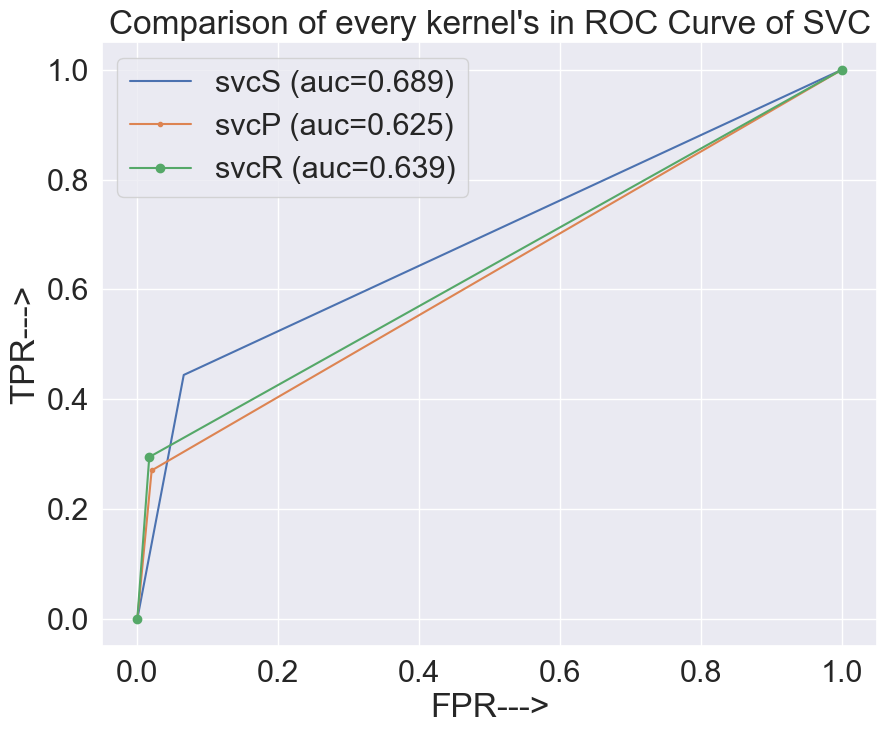

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(svcS_fpr,svcS_tpr,linestyle="-",label='svcS (auc=%0.3f)' %auc_svcS)
plt.plot(svcP_fpr,svcP_tpr,marker='.',label='svcP (auc=%0.3f)' %auc_svcP)
plt.plot(svcR_fpr,svcR_tpr,marker='o',label='svcR (auc=%0.3f)' %auc_svcR)
plt.xlabel('FPR--->')
plt.ylabel('TPR--->')
plt.title("Comparison of every kernel's in ROC Curve of SVC")
plt.legend()
plt.show()
plt.savefig('ROC Curve.png')

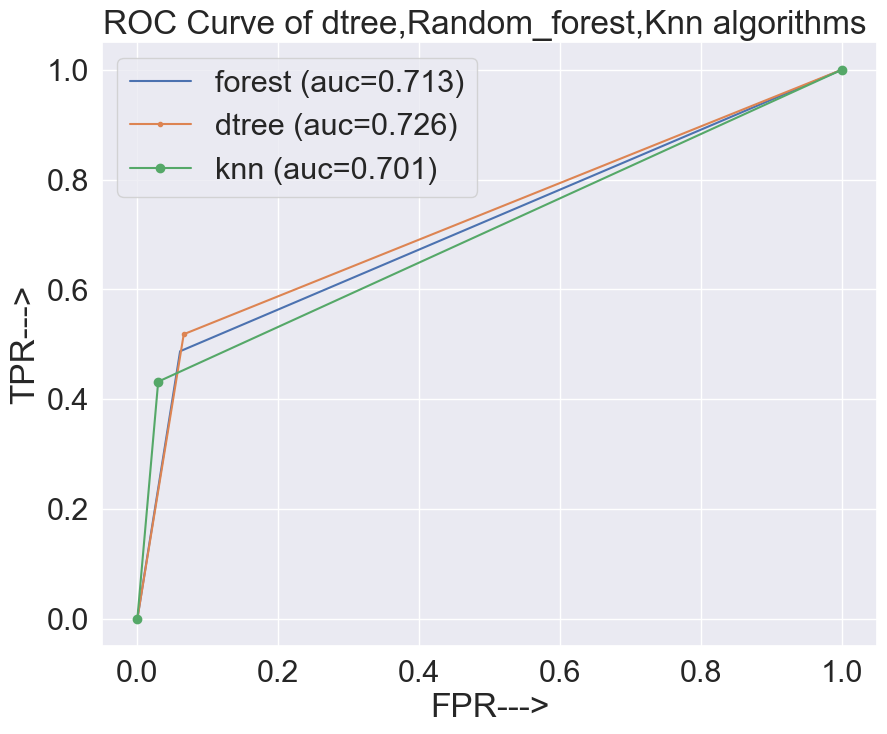

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(forest_fpr,forest_tpr,linestyle="-",label='forest (auc=%0.3f)' %auc_forest)
plt.plot(dtree_fpr,dtree_tpr,marker='.',label='dtree (auc=%0.3f)' %auc_dtree)
plt.plot(knn_fpr,knn_tpr,marker='o',label='knn (auc=%0.3f)' %auc_knn)
plt.xlabel('FPR--->')
plt.ylabel('TPR--->')
plt.title("ROC Curve of dtree,Random_forest,Knn algorithms ")
plt.legend()
plt.show()
plt.savefig('ROC Curve(different algorithms).png')

In [54]:
from sklearn.metrics import classification_report

In [55]:
print("Report of KNN algo: \n", classification_report(y_test,knnpred))
print(" Predicted KNN",knnpred)
print("\n")
print("Report of xgboost algo: \n", classification_report(y_test,xgbprd))
print("Predicted Xgboost",xgbprd )
print("\n")
print("Report of dtree algo: \n", classification_report(y_test,dtreepred))
print("Predicted Decision Tree", dtreepred)
print("\n")
print("Report of random forest algo: \n", classification_report(y_test,forestpred))
print("Predicted Random Forest",forestpred)

Report of KNN algo: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7335
           1       0.64      0.43      0.52       903

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

 Predicted KNN [0 0 0 ... 0 0 0]


Report of xgboost algo: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7335
           1       0.65      0.52      0.58       903

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238

Predicted Xgboost [0 0 0 ... 0 1 0]


Report of dtree algo: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7335
           1       0.49      0.52      0.50       903

    accuracy                         

***Here***
> ***'0' means "client hasn't subscribed a term deposite"***

> ***'1' means "Client has subscribed a term deposite"***

***KNN Algorithm***
> Accuracy in KNN algorithm is 0.91 means our model is 91.00% accurate.
In precision,High Precision means that false positive rate is low we have got 0.93 for 0 (not subscriber of term deposite)
and 0.64 precision for 1 (Subscriber of term deposite)
we got recall as 0.97 for 0 (not subscriber of term deposite) and 0.43 for 1 (Subscriber of term deposite).
f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision.
In our case accuracy score and f1 score differ much,f1 score is 0.95 for 0(not subscriber of term deposite) and 0.52 for 1(Subscriber of term deposite)

***xgboost Algorithm***
> Accuracy in xgboost algorithm is 0.92 means our model is 92.00% accurate.
In precision,High Precision means that false positive rate is low we have got 0.94 for 0 (not subscriber of term deposite)
and 0.65 precision for 1 (Subscriber of term deposite)
we got recall as 0.97 for 0 (not subscriber of term deposite) and 0.52 for 1 (Subscriber of term deposite).
f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision.
In our case accuracy score and f1 score differ much,f1 score is 0.95 for 0(not subscriber of term deposite) and 0.58 for1(Subscriber of term deposite)

***decision tree Algorithm***

> Accuracy in decision tree algorithm is 0.89 means our model is 89.00% accurate.
In precision,High Precision means that false positive rate is low we have got 0.94 for 0 (not subscriber of term deposite)
and 0.49 precision for 1 (Subscriber of term deposite)
we got recall as 0.93 for 0 (not subscriber of term deposite) and 0.52 for 1 (Subscriber of term deposite).
f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision.
In our case accuracy score and f1 score differ much,f1 score is 0.94 for 0(not subscriber of term deposite) and 0.50 for 1 (Subscriber of term deposite)

***Random Forest Algorithm***

> Accuracy in decision tree algorithm is 0.89 means our model is 89.00% accurate.
In precision,High Precision means that false positive rate is low we have got 0.94 for 0 (not subscriber of term deposite)
and 0.50 precision for 1 (Subscriber of term deposite)
we got recall as 0.94 for 0 (not subscriber of term deposite) and 0.49 for 1 (Subscriber of term deposite).
f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision.
In our case accuracy score and f1 score differ much,f1 score is 0.94 for 0(not subscriber of term deposite) and 0.49 for 1 (Subscriber of term deposite)


In [56]:
print("Confusion metrics of SVC using 'rbf' kernel : \n", classification_report(y_test,svcRpred))
print("\n")
print("Confusion metrics of SVC using 'sigmoid' kernel: \n", classification_report(y_test,svcSpred))
print("\n")
print("Confusion metrics of SVC using 'Polynomial' kernel : \n", classification_report(y_test,svcPpred))

Confusion metrics of SVC using 'rbf' kernel : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7335
           1       0.68      0.29      0.41       903

    accuracy                           0.91      8238
   macro avg       0.80      0.64      0.68      8238
weighted avg       0.89      0.91      0.89      8238



Confusion metrics of SVC using 'sigmoid' kernel: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7335
           1       0.45      0.44      0.45       903

    accuracy                           0.88      8238
   macro avg       0.69      0.69      0.69      8238
weighted avg       0.88      0.88      0.88      8238



Confusion metrics of SVC using 'Polynomial' kernel : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7335
           1       0.62      0.27      0.38       903

    accuracy            

> ***In SVM we have used different kernel's and we got best accuracy using rbf kernel***

### From the above results we can conclude that xgboost is giving the best model for this classification problem.
